In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import os
from matplotlib import pyplot
import shutil
%matplotlib inline

# Load Data

In [12]:
path = '/Users/isaacfinberg/Desktop/JHU/Theory ML/Project/archive/'
img_names = os.listdir(path + 'images')
metadata = pd.read_csv(path + 'HAM10000_metadata.csv')

In [13]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


# Data Split (train/val/test)

- Split based on: diagnosis, diagnosis provenance, localization
- If the combo of these 3 variables only had one instance, add instance to train set
- If the combo of these 3 variables only had one instance within the test+val set, add instance to test set

In [8]:
# Get metadata df with replicates and without the stratification that only have one instance
metadata_no_dup = metadata.loc[~metadata.duplicated(subset=['lesion_id']), :].reset_index(drop=True)

metadata_no_dup['split_col'] = (metadata_no_dup['dx'].astype(str) + '_' + metadata_no_dup['dx_type'].astype(str) + '_' 
                                + metadata_no_dup['localization'].astype(str))
split_col_dist = metadata_no_dup['split_col'].value_counts()
singular = split_col_dist[split_col_dist == 1].index.values
metadata_no_dup_non_singular = metadata_no_dup.loc[~metadata_no_dup['split_col'].isin(singular), :].reset_index(
                                                                                                    drop=True)
# Get train and test+val
X = metadata_no_dup_non_singular['image_id'].to_numpy()
y = metadata_no_dup_non_singular['dx'].to_numpy()
stratify = metadata_no_dup_non_singular['split_col'].to_numpy()
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=0, stratify=stratify)
# Add singular instances back to train
X_train = np.append(X_train, metadata_no_dup['image_id'][metadata_no_dup['split_col'].isin(singular)].values)
y_train = np.append(y_train, metadata_no_dup['dx'][metadata_no_dup['split_col'].isin(singular)].values)

# Re-get metadata for test+val that have no replicates and no single instances
metadata_test_val = metadata_no_dup_non_singular.loc[metadata_no_dup_non_singular['image_id'].isin(X_test_val), 
                                                                                     :].reset_index(drop=True)
split_col_dist = metadata_test_val['split_col'].value_counts()
singular = split_col_dist[split_col_dist == 1].index.values
metadata_tv_no_dup_non_singular = metadata_test_val.loc[~metadata_test_val['split_col'].isin(singular), :].reset_index(
                                                                                                    drop=True)
# Get test and val separately
index = metadata_test_val.index.values[~metadata_test_val['split_col'].isin(singular)]
stratify_test_val = metadata_tv_no_dup_non_singular['split_col'].to_numpy()
X_test_val = X_test_val[index]
y_test_val = y_test_val[index]
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=0, 
                                                stratify=stratify_test_val)
# Add singular instance back to test
X_test = np.append(X_test, metadata_test_val['image_id'][metadata_test_val['split_col'].isin(singular)].values)
y_test = np.append(y_test, metadata_test_val['dx'][metadata_test_val['split_col'].isin(singular)].values)

## Copy from total image folder into :
## - train
### -- folder per class
## - val
### -- folder per class
## - test
### -- folder per class

In [27]:
os.mkdir(path + 'train')
os.mkdir(path + 'rval')
os.mkdir(path + 'rtest')
img_sets = ['train', 'val', 'test']
dx = metadata['dx'].unique()
for i in img_sets:
    for d in dx:
        out_path = path + i + '/' + d
        os.mkdir(out_path)
splits = [X_train, X_val, X_test] 
for i, group in zip(img_sets, X_rtrain):
    for img in group:
        out_path = path + i + '/' + metadata['dx'][metadata['image_id'] ==  img].values[0]
        shutil.copy(path + 'images/' + img + '.jpg', out_path)

# Make sure split worked

In [58]:
# print(len(X_train), len(X_val), len(X_test))

4488 1481 1501


<AxesSubplot:>

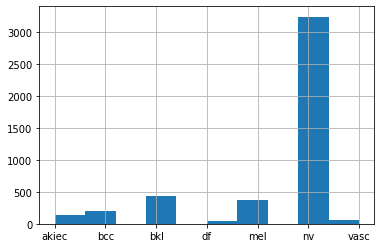

In [63]:
# metadata['dx'][metadata['image_id'].isin(X_train)].sort_values().hist()

<AxesSubplot:>

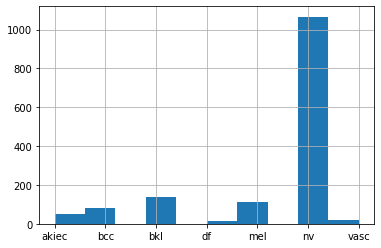

In [64]:
# metadata['dx'][metadata['image_id'].isin(X_val)].sort_values().hist()

<AxesSubplot:>

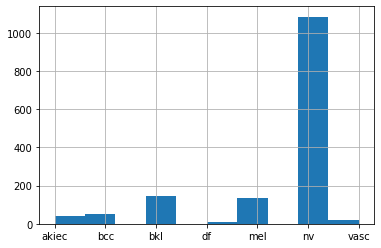

In [65]:
# metadata['dx'][metadata['image_id'].isin(X_test)].sort_values().hist()

<AxesSubplot:>

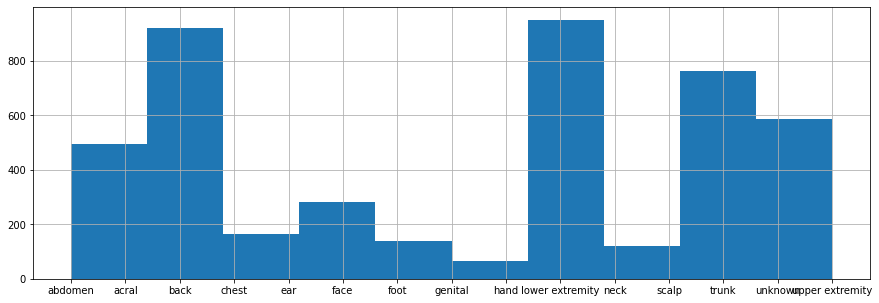

In [68]:
# pyplot.figure(figsize=(15,5))
# metadata['localization'][metadata['image_id'].isin(X_train)].sort_values().hist()

<AxesSubplot:>

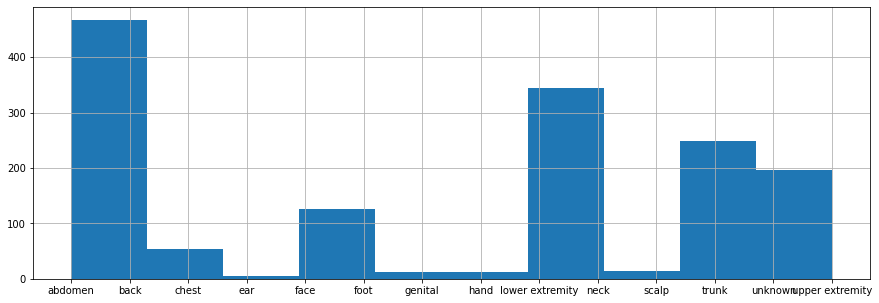

In [69]:
# pyplot.figure(figsize=(15,5))
# metadata['localization'][metadata['image_id'].isin(X_val)].sort_values().hist()

<AxesSubplot:>

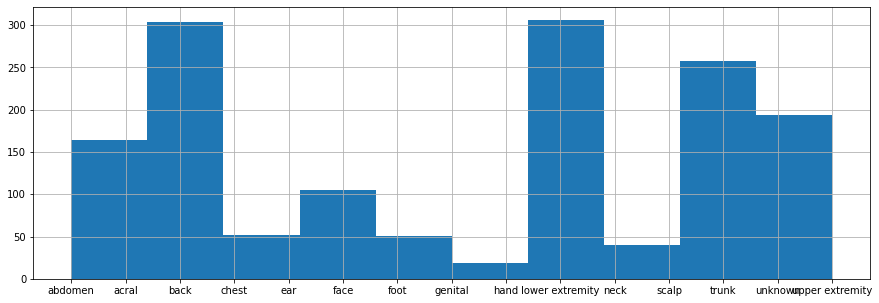

In [70]:
# pyplot.figure(figsize=(15,5))
# metadata['localization'][metadata['image_id'].isin(X_test)].sort_values().hist()

<AxesSubplot:>

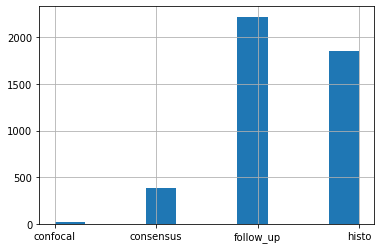

In [72]:
# metadata['dx_type'][metadata['image_id'].isin(X_train)].sort_values().hist()

<AxesSubplot:>

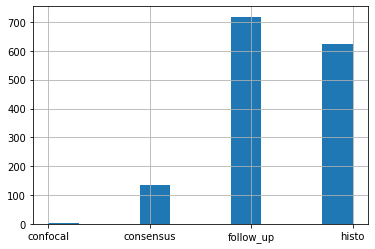

In [73]:
# metadata['dx_type'][metadata['image_id'].isin(X_val)].sort_values().hist()

<AxesSubplot:>

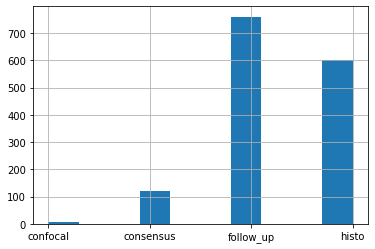

In [74]:
# metadata['dx_type'][metadata['image_id'].isin(X_test)].sort_values().hist()